In [2]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
plt.style.use('dark_background')
import plotly.express as px

1. Прочитайте CSV файл (використовуйте метод read_csv): 

In [256]:
df = pd.read_csv('C:/Users/tuf/Downloads/Global YouTube Statistics.csv',encoding = 'windows-1251')

2. Виведіть перші п'ять рядків (використовується метод head)

In [257]:
df.head()

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


3. Виведіть розміри датасету (використовуйте метод shape):

In [258]:
df.shape

(995, 28)

In [259]:
df.isna().mean()*100 

rank                                        0.000000
Youtuber                                    0.000000
subscribers                                 0.000000
video views                                 0.000000
category                                    4.623116
Title                                       0.000000
uploads                                     0.000000
Country                                    12.261307
Abbreviation                               12.261307
channel_type                                3.015075
video_views_rank                            0.100503
country_rank                               11.658291
channel_type_rank                           3.316583
video_views_for_the_last_30_days            5.628141
lowest_monthly_earnings                     0.000000
highest_monthly_earnings                    0.000000
lowest_yearly_earnings                      0.000000
highest_yearly_earnings                     0.000000
subscribers_for_last_30_days               33.

In [260]:
df.columns = df.columns.str.replace(' ','_') 


In [262]:
df.fillna(np.mean,inplace=True)

In [263]:
df.isna().mean()

rank                                       0.0
Youtuber                                   0.0
subscribers                                0.0
video_views                                0.0
category                                   0.0
Title                                      0.0
uploads                                    0.0
Country                                    0.0
Abbreviation                               0.0
channel_type                               0.0
video_views_rank                           0.0
country_rank                               0.0
channel_type_rank                          0.0
video_views_for_the_last_30_days           0.0
lowest_monthly_earnings                    0.0
highest_monthly_earnings                   0.0
lowest_yearly_earnings                     0.0
highest_yearly_earnings                    0.0
subscribers_for_last_30_days               0.0
created_year                               0.0
created_month                              0.0
created_date 

In [264]:
df.rename(columns=lambda x: x.lower(), inplace=True)

7. Перевірте, скільки унікальних країн представлено у колонці "Country

In [265]:
df.country.unique()

array(['India', 'United States', <function mean at 0x0000025E12533C40>,
       'Japan', 'Russia', 'South Korea', 'United Kingdom', 'Canada',
       'Brazil', 'Argentina', 'Chile', 'Cuba', 'El Salvador', 'Pakistan',
       'Philippines', 'Thailand', 'Colombia', 'Barbados', 'Mexico',
       'United Arab Emirates', 'Spain', 'Saudi Arabia', 'Indonesia',
       'Turkey', 'Venezuela', 'Kuwait', 'Jordan', 'Netherlands',
       'Singapore', 'Australia', 'Italy', 'Germany', 'France', 'Sweden',
       'Afghanistan', 'Ukraine', 'Latvia', 'Switzerland', 'Vietnam',
       'Malaysia', 'China', 'Iraq', 'Egypt', 'Andorra', 'Ecuador',
       'Morocco', 'Peru', 'Bangladesh', 'Finland', 'Samoa'], dtype=object)

In [266]:
df.country.nunique()

50

In [270]:
df.video_views.agg(['max','min','mean']).to_frame()

,video_views
max,2.280000e+11
min,0.000000e+00
mean,1.103954e+10


In [271]:
df.video_views.agg(['max','min','median']).to_frame() 

,video_views
max,2.280000e+11
min,0.000000e+00
median,7.760820e+09


In [273]:
top_countries = df.groupby('country').agg({'uploads':'sum'}).sort_values('uploads',ascending=False)

In [274]:
top_countries.head()

,uploads
country,
India,3728212
United States,1299609
Thailand,858953
Philippines,838543
Indonesia,678321


In [275]:
top_countries

,uploads
country,
India,3728212
United States,1299609
Thailand,858953
Philippines,838543
Indonesia,678321
Pakistan,507947
Ukraine,220128
United Arab Emirates,188422
Brazil,168178


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'United States'),
  Text(2, 0, '<function mean at 0x0000025E12533C40>'),
  Text(3, 0, 'Japan'),
  Text(4, 0, 'Russia'),
  Text(5, 0, 'South Korea'),
  Text(6, 0, 'United Kingdom'),
  Text(7, 0, 'Canada'),
  Text(8, 0, 'Brazil'),
  Text(9, 0, 'Argentina'),
  Text(10, 0, 'Chile'),
  Text(11, 0, 'Cuba'),
  Text(12, 0, 'El Salvador'),
  Text(13, 0, 'Pakistan'),
  Text(14, 0, 'Philippines'),
  Text(15, 0, 'Thailand'),
  Text(16, 0, 'Colombia'),
  Text(17, 0, 'Barbados'),
  Text(18, 0, 'Mexico'),
  Text(19, 0, 'United Arab Emirates'),
  Text(20, 0, 'Spain'),
  Text(21, 0, 'Saudi Arabia'),
  Text(22, 0, 'Indonesia'),
  Text(23, 0, 'Turkey'),
  Text(24, 0, 'Venezuela'),
  Text(25, 0, 'Kuwait'),
  Text(26, 0, 'Jordan'),
  Text(27, 0, 'Ne

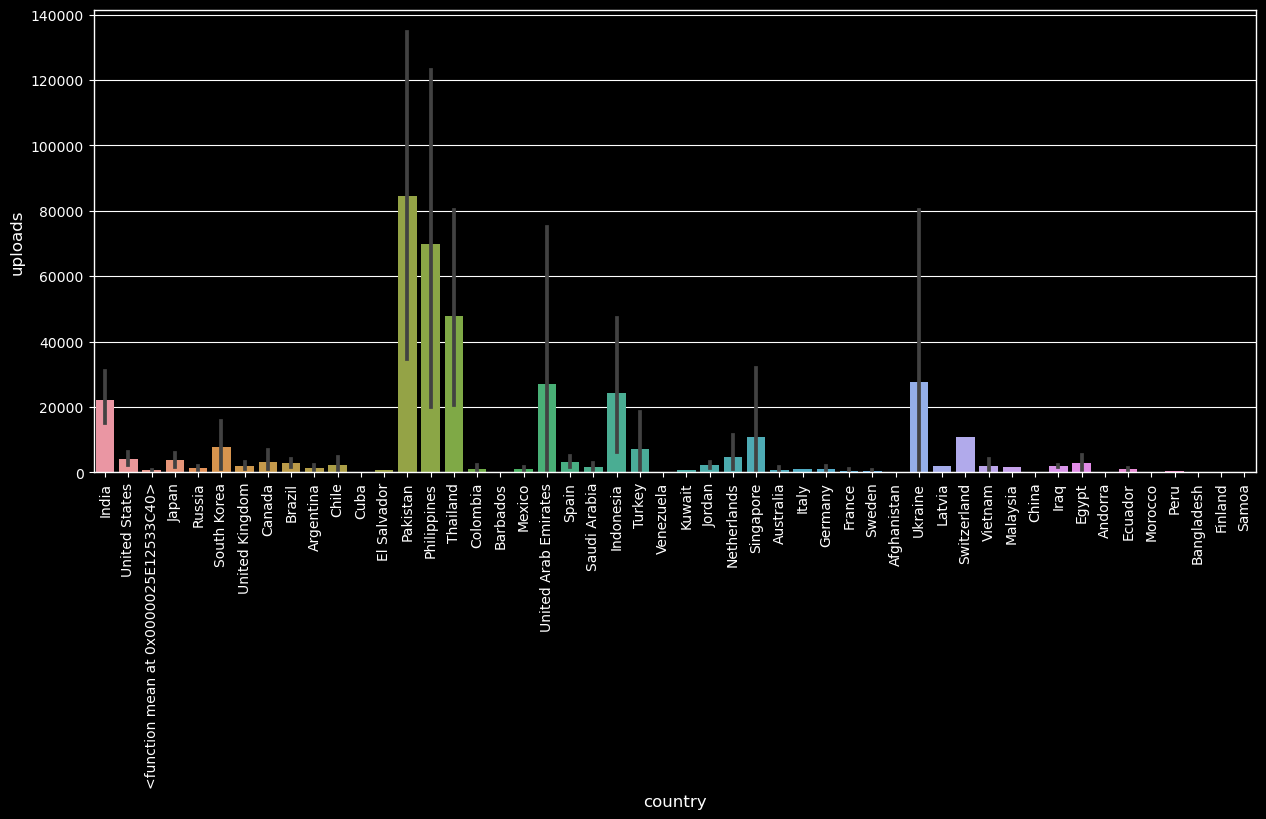

In [276]:
plt.figure(figsize=(15,6))
sns.barplot(x=df.country,y=df.uploads)
plt.xticks(rotation=90)

In [288]:
df.groupby('title').agg({'uploads':'sum'}).sort_values('uploads',ascending=False)

,uploads
title,
ABP NEWS,301308
GMA Integrated News,296272
TV9 Bharatvarsh,293516
Aaj Tak,283775
IndiaTV,273255
...,...
TheGameTheorists,0
Homem Aranha player,0
Live,0


In [4]:
df = pd.read_excel('C:/Users/tuf/Downloads/bestsellers with categories.xlsx')

In [5]:
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
df.shape

(550, 7)

Питання: Про скільки книг зберігає дані датасет? 

In [11]:
df.Name.nunique() 

351

In [21]:
df[df.Name.duplicated()] 

,Name,Author,User Rating,Reviews,Price,Year,Genre
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction
36,Between the World and Me,Ta-Nehisi Coates,4.7,10070,13,2016,Non Fiction
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction
...,...,...,...,...,...,...,...
543,Wonder,R. J. Palacio,4.8,21625,9,2016,Fiction
544,Wonder,R. J. Palacio,4.8,21625,9,2017,Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [49]:
columns = df.columns.str.replace(' ','_').str.lower()

In [50]:
columns

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

In [52]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [54]:
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [57]:
df.isna().mean() 

name           0.0
author         0.0
user_rating    0.0
reviews        0.0
price          0.0
year           0.0
genre          0.0
dtype: float64

In [58]:
df.genre.unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [69]:
stat_books = df.price.agg(['sum','min','max','mean','median']).to_frame()

In [71]:
stat_books = stat_books.reset_index().rename(columns = {'index':'aggfunc'})

In [75]:
df.user_rating.value_counts()

user_rating
4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.6      1
3.3      1
Name: count, dtype: int64

In [78]:
df.groupby(['name','user_rating']).va

In [85]:
df.user_rating.value_counts()

user_rating
4.8    127
4.7    108
4.6    105
4.5     60
4.9     52
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.6      1
3.3      1
Name: count, dtype: int64

In [89]:
df.groupby('name').agg({'reviews':'sum'}).sort_values('reviews', ascending=False)

,reviews
name,
The Fault in Our Stars,201928
"Oh, the Places You'll Go!",174672
Gone Girl,171813
The Girl on the Train,158892
"Unbroken: A World War II Story of Survival, Resilience, and Redemption",148365
...,...
The Daily Show with Jon Stewart Presents Earth (The Book): A Visitor's Guide to the Human Race,440
True Compass: A Memoir,438
George Washington's Sacred Fire,408


In [101]:
df

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [108]:
df.query('year==2010').sort_values('user_rating',ascending=False).head(50).price.max()

46

In [112]:
df.query('year==2010 and genre=="Fiction"').genre.agg(['count']).head(50)

count    20
Name: genre, dtype: int64

In [117]:
df.query('year==2010 and year==2011')

,name,author,user_rating,reviews,price,year,genre


In [119]:
df['year'] = pd.to_datetime(df.year, format = '%Y')

In [120]:
df.dtypes

name                   object
author                 object
user_rating           float64
reviews                 int64
price                   int64
year           datetime64[ns]
genre                  object
dtype: object

In [123]:
start_date =  pd.to_datetime('2010-01-01')
end_date   =  pd.to_datetime('2011-01-01')

In [126]:
df[df.year.between(start_date, end_date)].user_rating.value_counts()

user_rating
4.7    24
4.6    21
4.8    14
4.4    13
4.5    12
4.3     7
4.2     4
4.1     2
4.0     2
4.9     1
Name: count, dtype: int64

In [129]:
df.groupby('genre').price.agg(['max','min'])

,max,min
genre,,
Fiction,82,0
Non Fiction,105,0
